# Aircraft flying 

In [1]:
import pandas as pd
from opensky_api import OpenSkyApi
import requests
import matplotlib.pyplot as plt
%matplotlib inline

#  Data 
## Airlines

https://openflights.org/data.html

In [2]:
df_airlines = pd.read_csv("data/airlines.dat", names=['id','name','alias','iata','icao','callsign','country','active'])
df_airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


## Aircraft database
https://opensky-network.org/datasets/metadata/
Will give the model of the Aircrat

In [3]:
df_aircraft = pd.read_csv("data/aircraftDatabase.csv", low_memory=False)
df_aircraft.head()

,icao24,registration,manufacturericao,manufacturername,model,typecode,serialnumber,linenumber,icaoaircrafttype,operator,...,status,built,firstflightdate,seatconfiguration,engines,modes,adsb,acars,notes,categoryDescription
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,aa3487,N757F,NaN,Raytheon Aircraft Company,A36,NaN,E-3121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
2,ae267b,6533,VOUGHT,Aerospatiale,MH-65C Dolphin,AS65,6182,NaN,H2T,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,No ADS-B Emitter Category Information
3,a4fa61,N42MH,NaN,Piper,PA-31-350,NaN,31-7852015,NaN,NaN,NaN,...,NaN,1977-01-01,NaN,NaN,LYCOMING TI0-540 SER,False,False,False,NaN,NaN
4,c04101,C-FYQA,NaN,Champion Aircraft Corporation,7GCA (Champion),NaN,420,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN


# Flights now bbox France

In [30]:
#bboxFrance= [min_latitude, max_latitude, min_longitude, max_latitude]
bboxFrance= [41, 52, -5.5, 10]

import time
from datetime import datetime, timedelta
t = int(time.time())
print(datetime.fromtimestamp(t).strftime("%d/%m/%Y %H:%M"))

16/04/2019 21:02


In [31]:
#  fly data
# states values :'icao24','callsign','origin_country','time_position','last_contact','longitude','latitude',
#'geo_altidude','on_ground','velocity','heading','vertical_rate','sensors','baro_altitude',
# 'squawk','spi','position_source'
datafull =[]
api = OpenSkyApi()
states = api.get_states(time_secs= t, bbox=bboxFrance)
for s in states.states:
    #print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.velocity, s.callsign))
    if s.latitude != None and s.longitude != None and s.on_ground != True:
       #data.append(( s.callsign, float(s.longitude), float(s.latitude) ))
        datafull.append((s.icao24,s.callsign))
    else :
        pass
print(datafull[0:5]) 
print("Aircrafts actually on France : " +str(len(datafull)))

[('4b1805', 'SWR109H '), ('4b1806', 'SWR37G  '), ('4b1808', 'SWR57R  '), ('4952c2', 'TAP566W '), ('3c6667', 'DLH66U  ')]
Aircrafts actually on France : 634


In [32]:
df = pd.DataFrame(datafull,columns =['icao24','callsign'])
df['aircraft_model'] = df['icao24']
df['airlines_icao'] = df['callsign'].apply(lambda x: x[0:3])
df['airlines_name'] = df['airlines_icao']
df['airlines_country'] = df['airlines_icao']
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1805,SWR109H,4b1805,SWR,SWR,SWR
1,4b1806,SWR37G,4b1806,SWR,SWR,SWR
2,4b1808,SWR57R,4b1808,SWR,SWR,SWR
3,4952c2,TAP566W,4952c2,TAP,TAP,TAP
4,3c6667,DLH66U,3c6667,DLH,DLH,DLH


In [33]:
a = df_aircraft.set_index('icao24')['typecode']
df["aircraft_model"] = df["aircraft_model"].replace(a)

In [8]:
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1805,SWR109H,NaN,SWR,SWR,SWR
1,4b1806,SWR37G,NaN,SWR,SWR,SWR
2,4b1808,SWR57R,NaN,SWR,SWR,SWR
3,4b1801,SWR1665,NaN,SWR,SWR,SWR
4,4952c2,TAP566W,4952c2,TAP,TAP,TAP


In [9]:
a = df_airlines.set_index('icao')['name']
df["airlines_name"] = df["airlines_name"].replace(a)

In [10]:
a = df_airlines.set_index('icao')['country']
df["airlines_country"] = df["airlines_country"].replace(a)

In [11]:
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1805,SWR109H,NaN,SWR,Swissair,Switzerland
1,4b1806,SWR37G,NaN,SWR,Swissair,Switzerland
2,4b1808,SWR57R,NaN,SWR,Swissair,Switzerland
3,4b1801,SWR1665,NaN,SWR,Swissair,Switzerland
4,4952c2,TAP566W,4952c2,TAP,TAP Portugal,Portugal


In [12]:
by_airlines = df.groupby('airlines_name')['callsign'].nunique()

In [13]:
result = by_airlines[by_airlines > 10].sort_values(ascending = False)
print(result.head())

airlines_name
Ryanair       91
easyJet       40
EJU           30
Air France    28
Eurowings     27
Name: callsign, dtype: int64


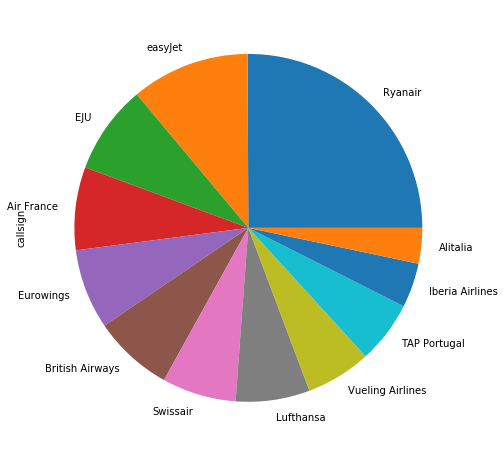

In [14]:
result.plot.pie(figsize=(8, 8))

In [15]:
by_country = df.groupby('airlines_country')['callsign'].nunique()

In [16]:
result_country = by_country[by_country > 10].sort_values(ascending = False)
print(result_country.head())

airlines_country
Ireland           98
United Kingdom    90
Germany           65
Spain             50
France            41
Name: callsign, dtype: int64


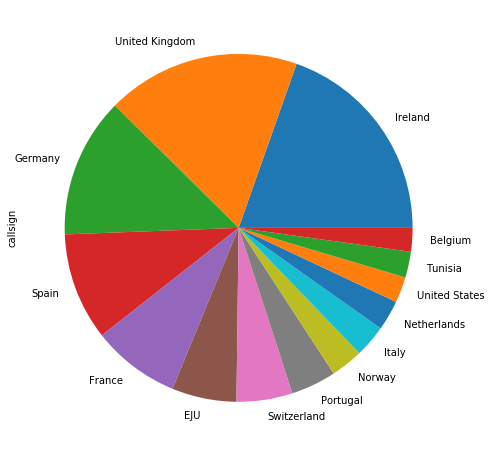

In [17]:
result_country.plot.pie(figsize=(8, 8))

In [26]:
df['aircraft_model']= df['aircraft_model'].astype(str)
#df['aircraft_model'] = df['aircraft_model'].apply(lambda x: x[0:-4])
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1805,SWR109H,,SWR,Swissair,Switzerland
1,4b1806,SWR37G,,SWR,Swissair,Switzerland
2,4b1808,SWR57R,,SWR,Swissair,Switzerland
3,4b1801,SWR1665,,SWR,Swissair,Switzerland
4,4952c2,TAP566W,49,TAP,TAP Portugal,Portugal


In [27]:
by_model = df.groupby('aircraft_model')['callsign'].nunique()

In [28]:
result_model = by_model[by_model > 3].sort_values(ascending = False)
print(result_model.head())

aircraft_model
      564
44     11
40     11
34      7
3c      5
Name: callsign, dtype: int64


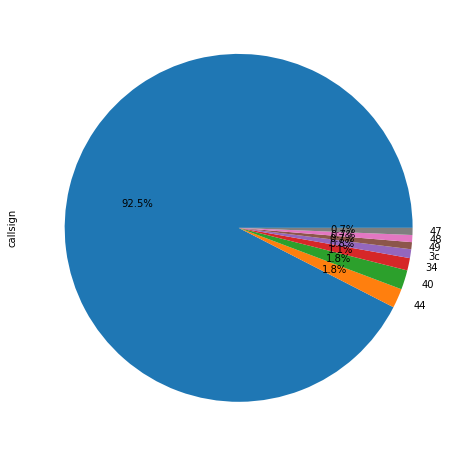

In [29]:
result_model.plot.pie(figsize=(8, 8),autopct='%1.1f%%')